# <center>Classification<center>

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).<br>
<br>
For example, spam detection in email service providers can be identified as a classification problem. This is s binary classification since there are only 2 classes as spam and not spam. A classifier utilizes some training data to understand how given input variables relate to the class. In this case, known spam and non-spam emails have to be used as the training data. When the classifier is trained accurately, it can be used to detect an unknown email.<br>
<br>
Classification belongs to the category of supervised learning where the targets also provided with the input data. There are many applications in classification in many domains such as in credit approval, medical diagnosis, target marketing etc.<br>

There are two types of learners in classification as lazy learners and eager learners.<br>
<b>Lazy learners</b><br>
Lazy learners simply store the training data and wait until a testing data appear. When it does, classification is conducted based on the most related data in the stored training data. Compared to eager learners, lazy learners have less training time but more time in predicting.<br>
Ex. k-nearest neighbor, Case-based reasoning<br>
<b>Eager learners</b><br>
Eager learners construct a classification model based on the given training data before receiving data for classification. It must be able to commit to a single hypothesis that covers the entire instance space. Due to the model construction, eager learners take a long time for train and less time to predict.<br>
Ex. Decision Tree, Naive Bayes, Artificial Neural Networks<br>

# Classification Algorithms
There is a lot of classification algorithms available now but it is not possible to conclude which one is superior to other. It depends on the application and nature of available data set. For example, if the classes are linearly separable, the linear classifiers like Logistic regression, Fisher’s linear discriminant can outperform sophisticated models and vice versa.


## K-Nearest Neighbours Algorithm


K-nearest neighbors is one of the most basic yet important classification algorithms in machine learning. KNNs belong to the supervised learning domain and have several applications in pattern recognition, data mining, and intrusion detection.<br>
<br>
These KNNs are used in real-life scenarios where non-parametric algorithms are required. These algorithms do not make any assumptions about how the data is distributed. When we are given prior data, the KNN classifies the coordinates into groups that are identified by a specific attribute.

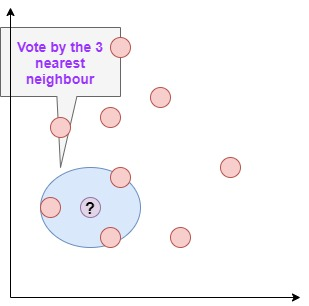

k-Nearest Neighbor is a lazy learning algorithm which stores all instances correspond to training data points in n-dimensional space. When an unknown discrete data is received, it analyzes the closest k number of instances saved (nearest neighbors)and returns the most common class as the prediction and for real-valued data it returns the mean of k nearest neighbors.
In the distance-weighted nearest neighbor algorithm, it weights the contribution of each of the k neighbors according to their distance using the following query giving greater weight to the closest neighbors.<br>

<a href="https://www.codecogs.com/eqnedit.php?latex=w&space;=&space;\frac{1}{d(x_{q},x_{i})^{2}}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?w&space;=&space;\frac{1}{d(x_{q},x_{i})^{2}}" title="w = \frac{1}{d(x_{q},x_{i})^{2}}" /></a>

<br>Usually KNN is robust to noisy data since it is averaging the k-nearest neighbors.


In [2]:
# Let's Implement

# Steps in KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data<br>
3.a) Calculate the distance between the query example and the current example from the data.<br>
3.b) Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

In [3]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def main():
    '''
    # Regression Data
    # 
    # Column 0: height (inches)
    # Column 1: weight (pounds)
    '''
    reg_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45],
    ]
    
    # Question:
    # Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
    reg_query = [60]
    reg_k_nearest_neighbors, reg_prediction = knn(
        reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
    )
    
    '''
    # Classification Data
    # 
    # Column 0: age
    # Column 1: likes pineapple
    '''
    clf_data = [
       [22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [45, 0],
    ]
    # Question:
    # Given the data we have, does a 33 year old like pineapples on their pizza?
    clf_query = [33]
    clf_k_nearest_neighbors, clf_prediction = knn(
        clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
    )

if __name__ == '__main__':
    main()


In [5]:
#from knn_from_scratch import knn, euclidean_distance

def recommend_movies(movie_query, k_recommendations):
    raw_movies_data = []
    with open('C:\\Users\\spras\\Documents\\Notebooks\\Data\\movies_recommendation_data.csv', 'r') as md:
        # Discard the first line (headings)
        next(md)

        # Read the data into memory
        for line in md.readlines():
            data_row = line.strip().split(',')
            raw_movies_data.append(data_row)

    # Prepare the data for use in the knn algorithm by picking
    # the relevant columns and converting the numeric columns
    # to numbers since they were read in as strings
    movies_recommendation_data = []
    for row in raw_movies_data:
        data_row = list(map(float, row[2:]))
        movies_recommendation_data.append(data_row)

    # Use the KNN algorithm to get the 5 movies that are most
    # similar to The Post.
    recommendation_indices, _ = knn(
        movies_recommendation_data, movie_query, k=k_recommendations,
        distance_fn=euclidean_distance, choice_fn=lambda x: None
    )

    movie_recommendations = []
    for _, index in recommendation_indices:
        movie_recommendations.append(raw_movies_data[index])

    return movie_recommendations

if __name__ == '__main__':
    the_post = [7.2, 1, 1, 0, 0, 0, 0, 1, 0] # feature vector for The Post
    recommended_movies = recommend_movies(movie_query=the_post, k_recommendations=5)

    # Print recommended movie titles
    for recommendation in recommended_movies:
        print(recommendation[1])

12 Years a Slave
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind


# K-NN classification
In K-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.<br>
To determine which of the K instances in the training dataset are most similar to a new input, a distance measure is used. For real-valued input variables, the most popular distance measure is the Euclidean distance.

### The Euclidean distance
The Euclidean distance is the most common distance metric used in low dimensional data sets. It is also known as the L2 norm. The Euclidean distance is the usual manner in which distance is measured in the real world.<BR>
where p and q are n-dimensional vectors and denoted by p = (p1, p2,…, pn) and q = (q1, q2,…, qn) represent the n attribute values of two records.
While Euclidean distance is useful in low dimensions, it doesn’t work well in high dimensions and for categorical variables. The drawback of Euclidean distance is that it ignores the similarity between attributes. Each attribute is treated as totally different from all of the attributes.<br>
Other popular distance measures :<br>
<b>Hamming Distance:</b> Calculate the distance between binary vectors.<br>
<b>Manhattan Distance:</b> Calculate the distance between real vectors using the sum of their absolute difference. Also called City Block Distance.<br>
<b>Minkowski Distance:</b> Generalization of Euclidean and Manhattan distance.<br>


### Performance of the K-NN algorithm is influenced by three main factors :
The distance function or distance metric used to determine the nearest neighbors.<br>
The decision rule used to derive a classification from the K-nearest neighbors.<br>
The number of neighbors used to classify the new example.<br>
### Advantages of K-NN :<br>
The K-NN algorithm is very easy to implement.<br>
Nearly optimal in the large sample limit.<br>
Uses local information, which can yield highly adaptive behavior.<br>
Lends itself very easily to parallel implementation.<br>
### Disadvantages of K-NN :
Large storage requirements.<br>
Computationally intensive recall.<br>
Highly susceptible to the curse of dimensionality.<br>
### K-NN Algorithm finds its applications in :
Finance — financial institutes will predict the credit rating of customers.<br>
Healthcare — gene expression.<br>
Political Science — classifying potential voters in two classes will vote or won’t vote.<br>
Handwriting detection.<br>
Image Recognition.<br>
Video Recognition.<br>
Pattern Recognition.<br>

# Support Vector Machine Algorithm

Support Vector Machines are a type of supervised machine learning algorithm that provides analysis of data for classification and regression analysis. While they can be used for regression, SVM is mostly used for classification. We carry out plotting in the n-dimensional space. The value of each feature is also the value of the specified coordinate. Then, we find the ideal hyperplane that differentiates between the two classes.

These support vectors are the coordinate representations of individual observation. It is a frontier method for segregating the two classes.

## How does SVM work?
The basic principle behind the working of Support vector machines is simple – Create a hyperplane that separates the dataset into classes. Suppose that for a given dataset, you have to classify red triangles from blue circles. Your goal is to create a line that classifies the data into two classes, creating a distinction between red triangles and blue circles.

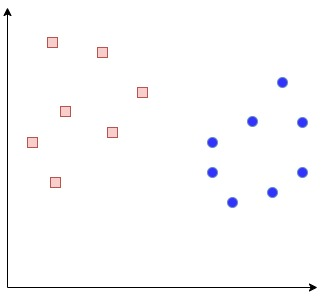

<div class="mxgraph" style="max-width:100%;border:1px solid transparent;" data-mxgraph="{&quot;highlight&quot;:&quot;#0000ff&quot;,&quot;nav&quot;:true,&quot;resize&quot;:true,&quot;toolbar&quot;:&quot;zoom layers lightbox&quot;,&quot;edit&quot;:&quot;_blank&quot;,&quot;xml&quot;:&quot;&lt;mxfile host=\&quot;www.draw.io\&quot; modified=\&quot;2020-01-09T12:12:59.424Z\&quot; agent=\&quot;Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36\&quot; etag=\&quot;vkv_Hn9ES0-sjH8W02Ux\&quot; version=\&quot;12.5.1\&quot; type=\&quot;device\&quot;&gt;&lt;diagram id=\&quot;WgPSXXFFZHyVH6u5-YNa\&quot; name=\&quot;Page-1\&quot;&gt;7ZlNj5swEIZ/DcdK2AYCxybdbKVqpUqR2rMXHLDqxNQ4X/31NYsdsLOrELUrK2hziPCLPbafGQ1jCNBic3wUuK6eeEFYAMPiGKAvAYRpkqr/Vjh1QgzDTigFLToJ9MKK/iFaNN12tCCN1VFyziStbTHn2y3JpaVhIfjB7rbmzJ61xiW5EFY5ZpfqT1rISm8rDnv9K6FlZWYGob6zwaazFpoKF/wwkNBDgBaCc9ldbY4Lwlp2hks3bvnG3fPCBNnKMQN+40bEJRI/vs0zmO3ZU70oP2kre8x2esN6sfJkCJBt8bkFqVo5w01D8wDNK7lhSgDqshtAiguO/cLAebsqTAjfEClOqsuhB2p4VgOWRhOEYUn3tnms/VqezZ1n+M6pmhiGOgRhpO3oCERJaJto+E7kRI8aArxiKHXsSCxKIi/sqIvBrnvpxT03uAp+uGq0q+L4iqF39hW67qtDRSVZ1Thv2weVO21X4abu0tmaHomaar6mjC044+JlOFqnOclb9zZS8F9kcOc5jSO1fePtPRGSHG/1t3FIanMEJi0P4gG8Eg8gfNv1FutbwUZTAZvYYKFvsPFEwCLkRCz0DDaZClgnN8PQM9jZVMDOnIhNPINNJwIWpsiO2Ngz2GwqYDMbLJhlfsGCEWWBMqPOjKox/0fG7W+5fI1xkqfkef1/GEduuo08By8YUSHcGeM4dBj7zrxgRLFwZ4wj9wSR+s4VI+qGO2McuzVv5juOR5QQ98YYOIx9FxPmXDMhxhfPPN+HYrOFCTF2c4X3ugJOsHZzX+7M3o2xavZfELq3l/1nGPTwFw==&lt;/diagram&gt;&lt;/mxfile&gt;&quot;}"></div>
<script type="text/javascript" src="https://www.draw.io/js/viewer.min.js"></script>

While one can hypothesize a clear line that separates the two classes, there can be many lines that can do this job. Therefore, there is not a single line that you can agree on which can perform this task. Let us visualize some of the lines that can differentiate between the two classes as follows –

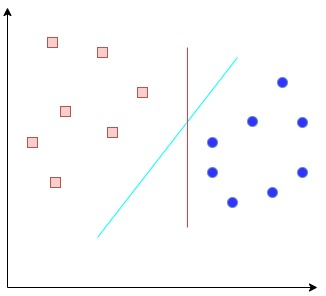

In the above visualizations, we have a blue line and a red line. Which one do you think would better differentiate the data into two classes? If you choose the red line, then it is the ideal line that partitions the two classes properly. However, we still have not concretized the fact that it is the universal line that would classify our data most efficiently.

The green line cannot be the ideal line as it lies too close to the red class. Therefore, it does not provide a proper generalization which is our end goal.<br>
<br>
According to SVM, we have to find the points that lie closest to both the classes. These points are known as support vectors. In the next step, we find the proximity between our dividing plane and the support vectors. The distance between the points and the dividing line is known as margin. The aim of an SVM algorithm is to maximize this very margin. When the margin reaches its maximum, the hyperplane becomes the optimal one.

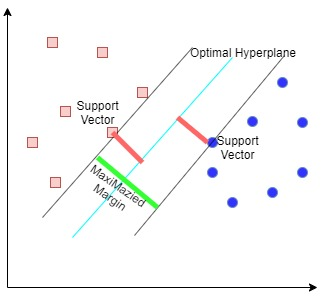

The SVM model tries to enlarge the distance between the two classes by creating a well-defined decision boundary. In the above case, our hyperplane divided the data. While our data was in 2 dimensions, the hyperplane was of 1 dimension. For higher dimensions, say, an n-dimensional Euclidean Space, we have an n-1 dimensional subset that divides the space into two disconnected components.

In [2]:
#

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second. Sounds simple enough, but there’s an infinite amount of lines to choose from. How do we know which line will do the best job of classifying the data? This is where the LSVM algorithm comes in to play. The LSVM algorithm will select a line that not only separates the two classes but stays as far away from the closest samples as possible. In fact, the “support vector” in “support vector machine” refers to two position vectors drawn from the origin to the points which dictate the decision boundary.


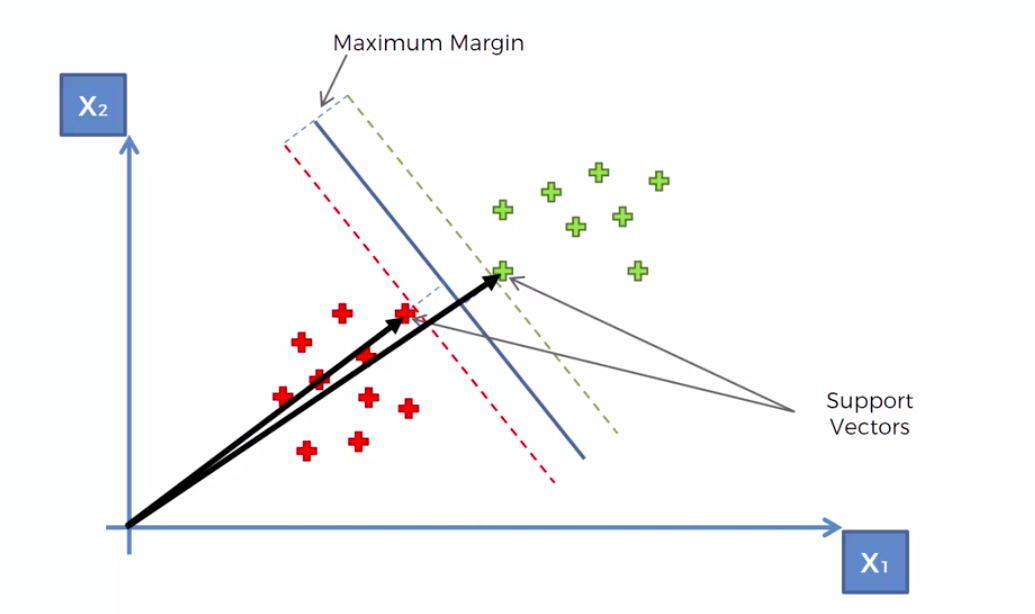

# Algorithm
Suppose, we had a vector w which is always normal to the hyperplane (perpendicular to the line in 2 dimensions). We can determine how far away a sample is from our decision boundary by projecting the position vector of the sample on to the vector w. As a quick refresher, the dot product of two vectors is proportional to the projection of the first vector on to the second.


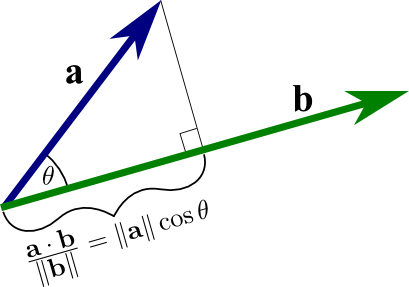

If it’s a positive sample, we’re going to insist that the proceeding decision function (the dot product of w and the position vector of a given sample plus some constant) returns a value greater than or equal to 1.


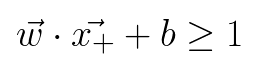

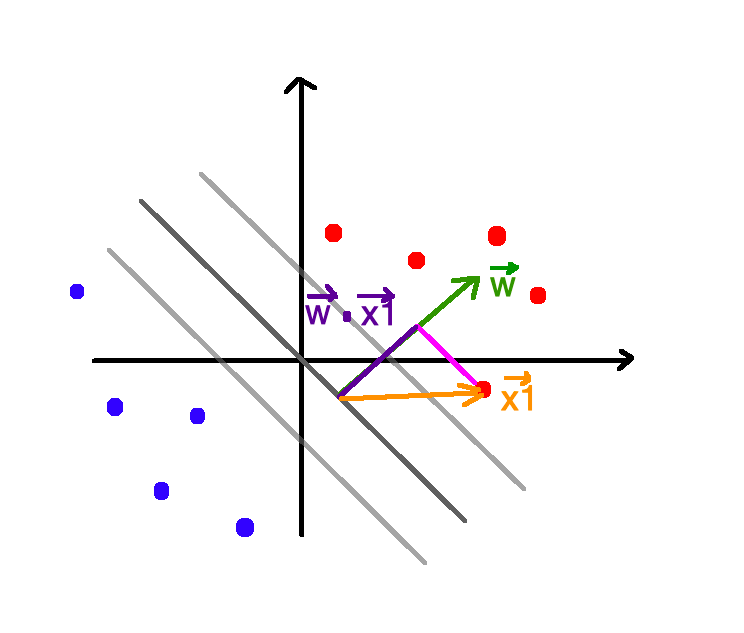

Similarly, if it’s a negative sample, we’re going to insist that the proceeding decision function returns a value smaller than or equal to -1.


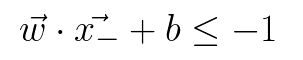

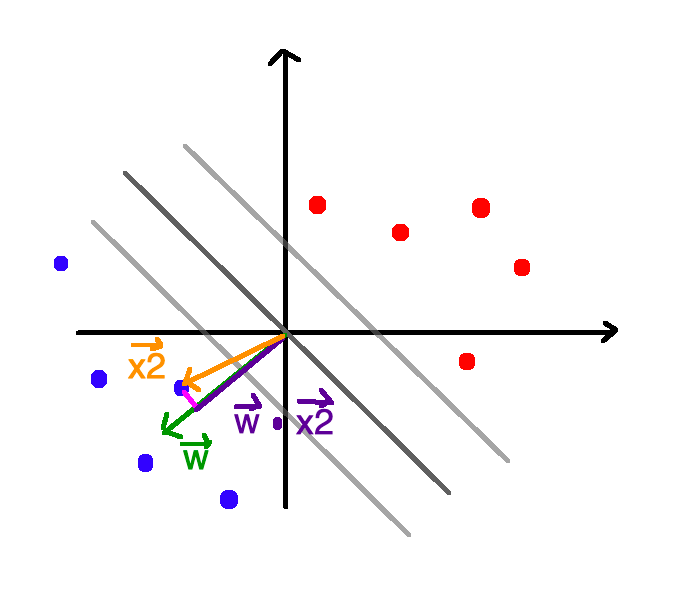

In other words, we won’t consider any samples located between the decision boundary and support vectors.


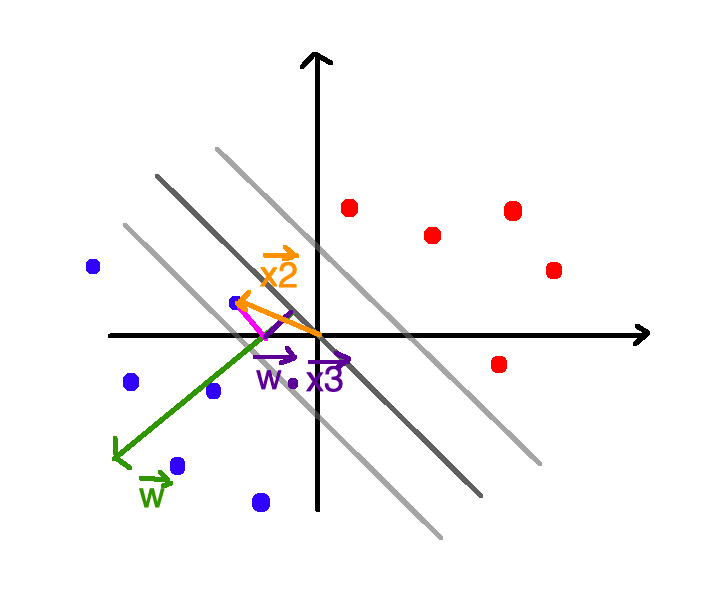

As stated in the MIT lecture(https://www.youtube.com/watch?v=_PwhiWxHK8o), we introduce an additional variable stickily for convenience. The variable y will be equal to positive one for all positive samples and negative one for all negative samples.


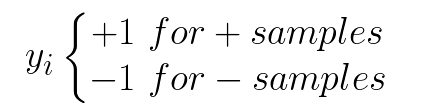

After multiplying by y, the equations for the positive and negative samples are equal to one another.


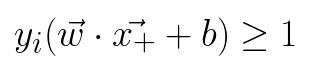

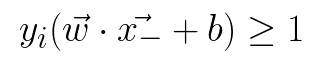

Meaning, we can simplify the constraints down to a single equation.


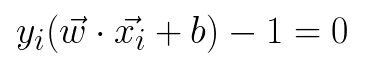

Next, we need to address the process by which we go about maximizing the margin. To get an equation for the width of the margin, we subtract the first support vector from the one below it and the multiply the result by the unit vector of w which is always perpendicular to the decision boundary.


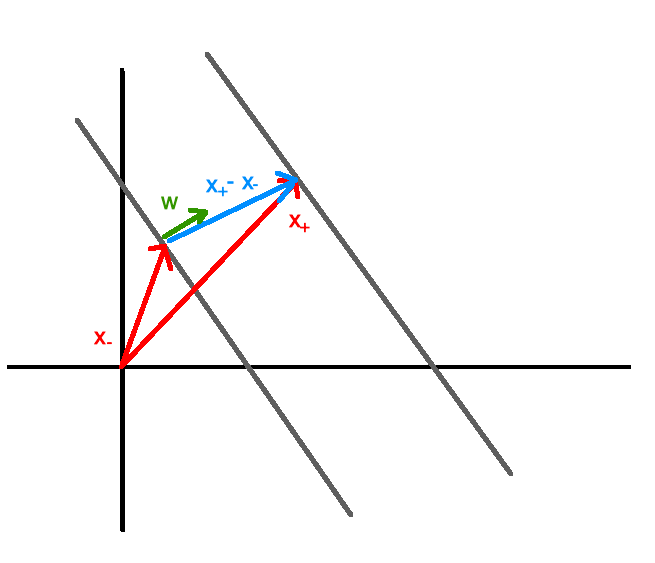

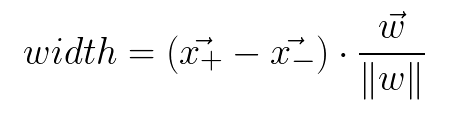

Using the constraints from above and a bit of algebra, we get the following.

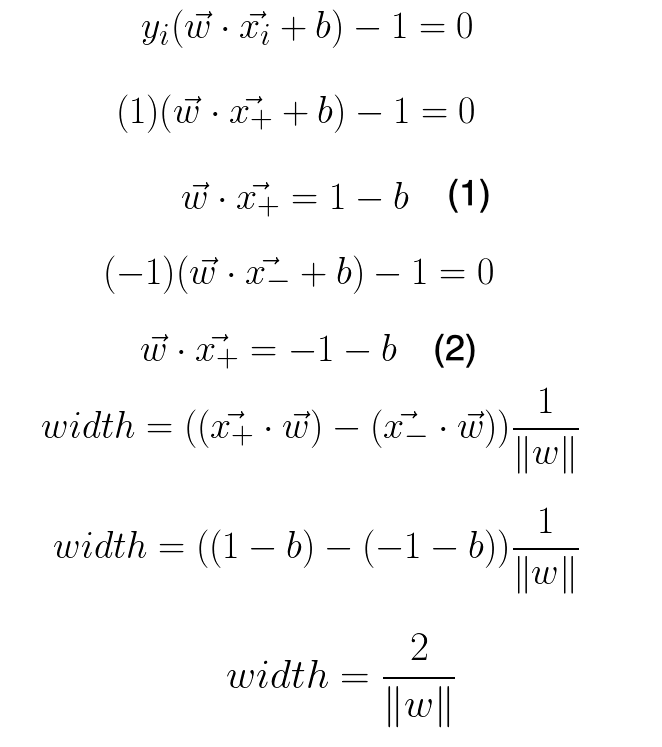

Therefore, in order to select the optimal decision boundary, we must maximize the equation we just computed. We apply a few more tricks before proceeding (refer to the MIT lecture https://www.youtube.com/watch?v=_PwhiWxHK8o).

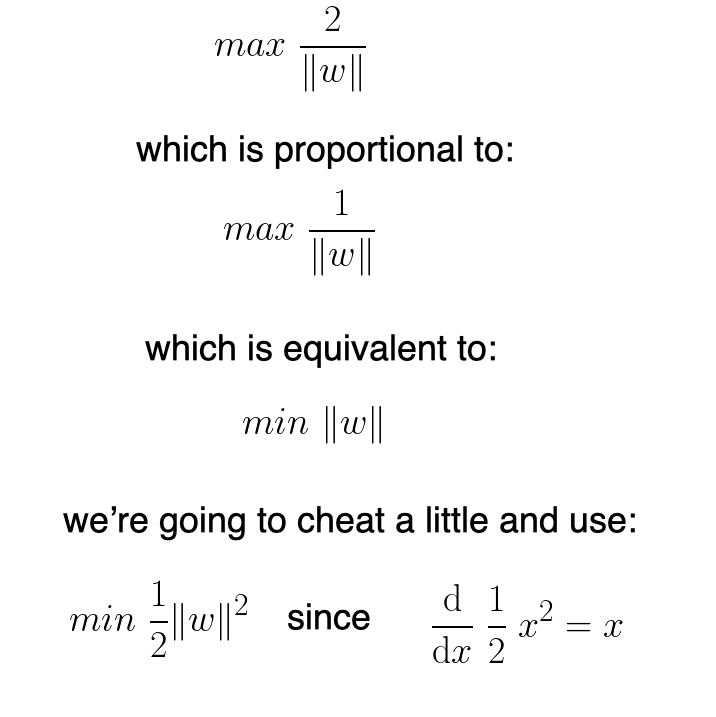

Now, in most machine learning algorithms, we’d use something like gradient descent to minimize said function, however, for support vector machines, we use the Lagrangian. The Lagrangian is beyond the scope of this article but if you’re in need of a quick crash course, I recommend checking out Khan Academy(https://www.youtube.com/watch?v=hQ4UNu1P2kw). In essence, using Lagrangian, we can solve for the global minimum like we’d do in high school level calculus (i.e. take the derivative of the function and make it equal to zero). The Lagrange tells us to subtract the cost function by the summation over all the constraints where each of those constraints will be multiplied by some constant alpha (normally written as lambda for the Lagrangian).

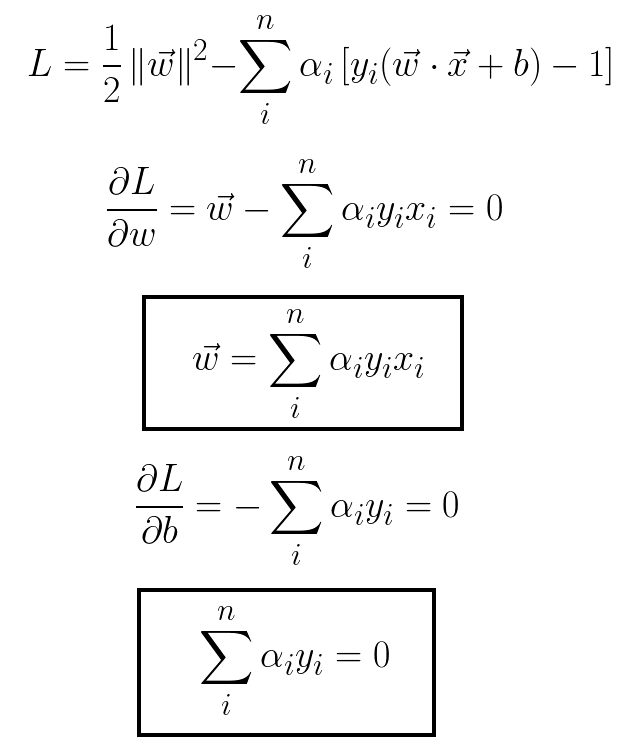

Then, we perform some more algebra, plugging the equations we found in the previous step back into the original equation.


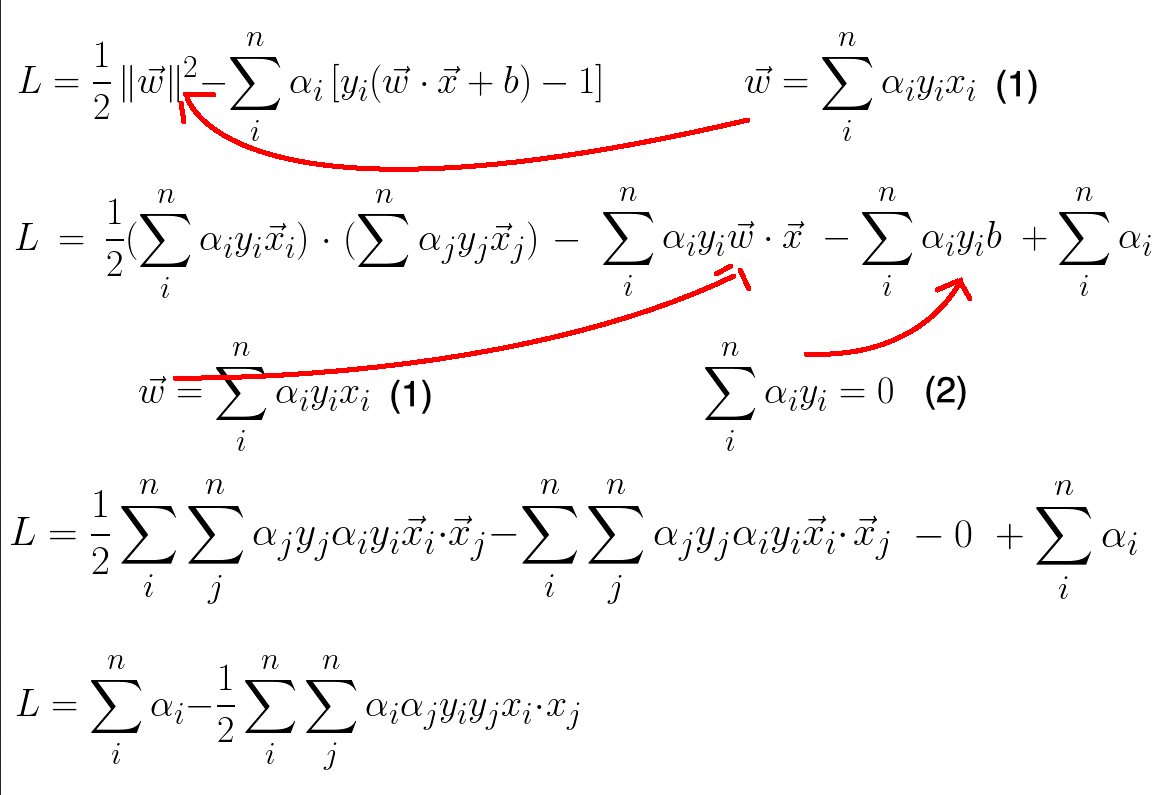

Before we can proceed any further, we need to express the equation in terms of matrices instead of summations. The reason being, the qp function from the CVXOPT library(https://cvxopt.org/userguide/coneprog.html#quadratic-programming), which we’ll use to solve the Lagrangian, accepts very specific arguments. Thus, we need to go from:


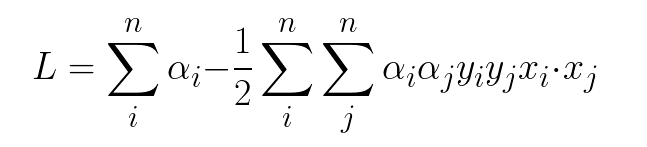

where
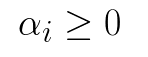

and'
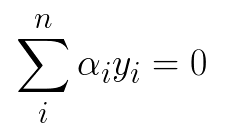

to
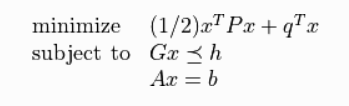

We can achieve this using the following identities:
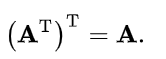

In applying them, we get:

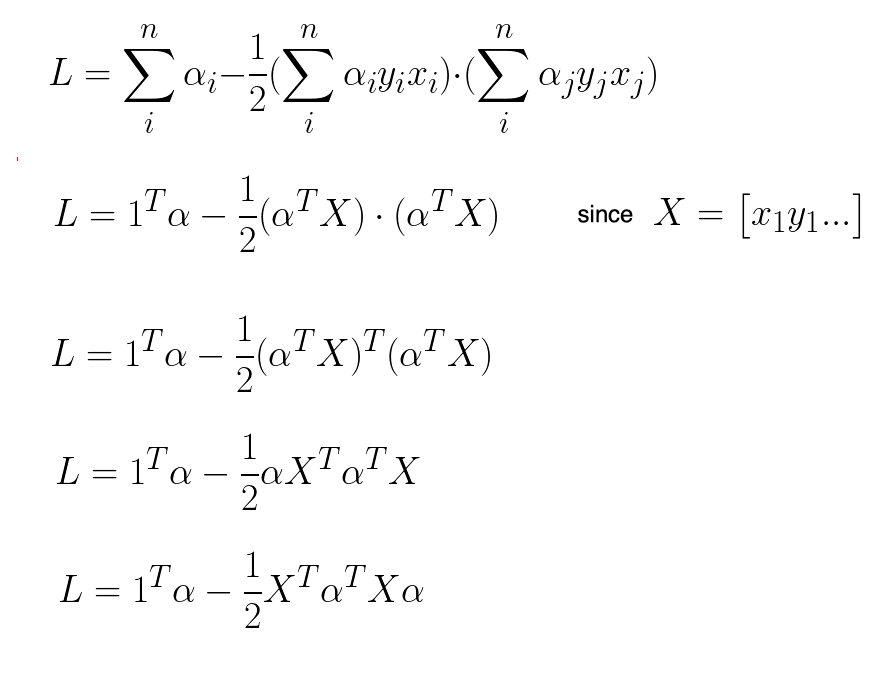

Note: X is the multiplication of x an y (not to be confused with x)
Then, we map the variables to those expected by the CVXOPT library(https://cvxopt.org/userguide/coneprog.html#quadratic-programming).

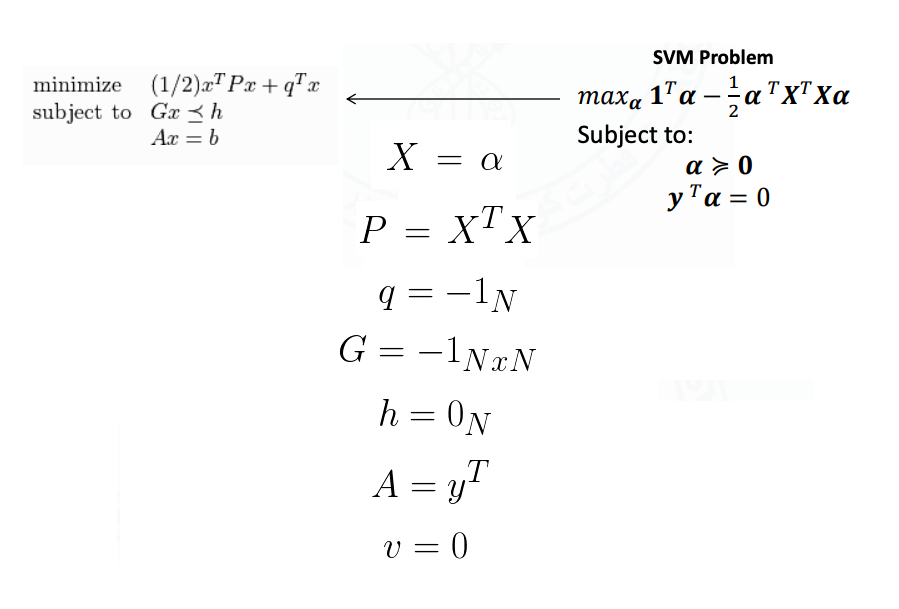

# Python Code
Now, we’re ready to write some code. We’ll start off by importing the necessary libraries.

In [4]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

In [5]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
prediction = clf.predict([[0,6]])

In [7]:
prediction

array([2])

In [8]:
##########################################################################################################################

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [10]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [12]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma="auto").fit(X, y)

In [13]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arangee(x_min, x_max, h),
 np.arange(y_min, y_max, h))

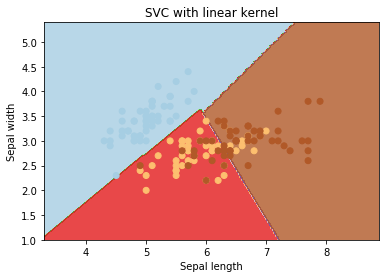

In [16]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

Example: Have rbf kernel

Change the kernel type to rbf in below line and look at the impact.

In [33]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)

In [34]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

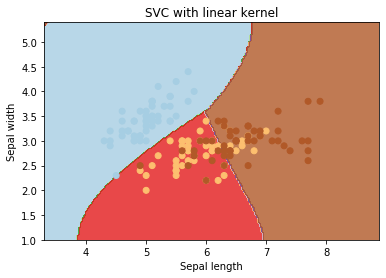

In [35]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

I would suggest you to go for linear kernel if you have large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can RBF but do not forget to cross validate for its parameters as to avoid over-fitting.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

Example: Let’s difference if we have gamma different gamma values like 0, 10 or 100.

In [36]:
# svc = svm.SVC(kernel='rbf', C=1,gamma=0).fit(X, y) # 10, 100, 0)-> error

C: Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.



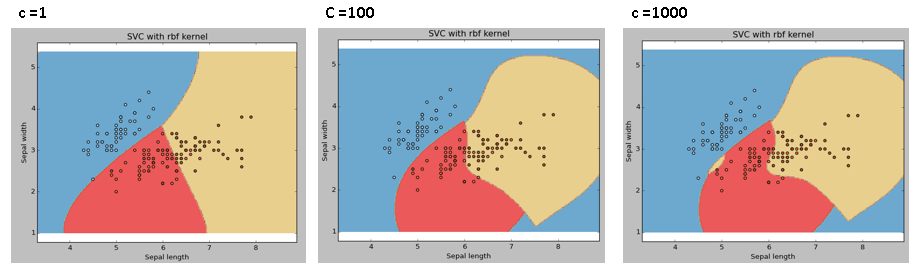

We should always look at the cross validation score to have effective combination of these parameters and avoid over-fitting.

Pros and Cons associated with SVM<br>
Pros:<br>
It works really well with clear margin of separation<br>
It is effective in high dimensional spaces.<br>
It is effective in cases where number of dimensions is greater than the number of samples.<br>
It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.<br>
Cons:<br>
It doesn’t perform well, when we have large data set because the required training time is higher<br>
It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping<br>
SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

# Decision Trees


Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown below

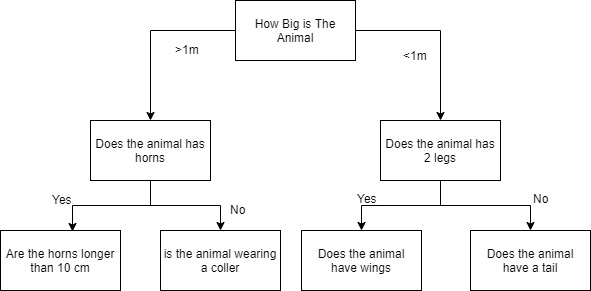

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes. The trick, of course, comes in deciding which questions to ask at each step. In machine learning implementations of decision trees, the questions generally take the form of axisaligned splits in the data; that is, each node in the tree splits the data into two groups using a cutoff
value within one of the features. Let’s now take a look at an example.

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

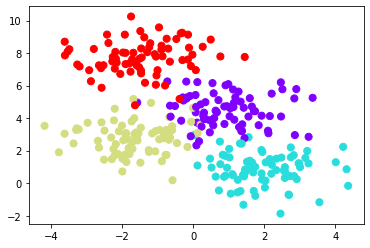

In [4]:
x, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap='rainbow')

In [9]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
tree = DecisionTreeClassifier().fit(x,y)

In [10]:
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax=ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:,0],X[:,1],
    c=y,s=30, cmap=cmap, clim=(y.min(), y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    # fit the estimator
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim,num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours=ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes+1)-0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

C:\Users\spras\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'clim'
  app.launch_new_instance()


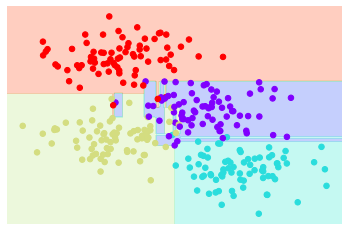

In [11]:
visualize_classifier(DecisionTreeClassifier(),x,y)

# Decision Trees in Machine Learning
Decision Tree models are created using 2 steps:<b> Induction and Pruning</b>. Induction is where we actually build the tree i.e set all of the hierarchical decision boundaries based on our data. Because of the nature of training decision trees they can be prone to major overfitting. Pruning is the process of removing the unnecessary structure from a decision tree, effectively reducing the complexity to combat overfitting with the added bonus of making it even easier to interpret.
### Induction
From a high level, decision tree induction goes through 4 main steps to build the tree:<br>
1. Begin with your training dataset, which should have some feature variables and classification or regression output.
2. Determine the “best feature” in the dataset to split the data on; more on how we define “best feature” later
2. Split the data into subsets that contain the possible values for this best feature. This splitting basically defines a node on the tree i.e each node is a splitting point based on a certain feature from our data.
3. Recursively generate new tree nodes by using the subset of data created from step 3. We keep splitting until we reach a point where we have optimised, by some measure, maximum accuracy while minimising the number of splits / nodes.

Step 1 is easy, just grab your dataset!<br>
For step 2, the selection of which feature to use and the specific split is commonly chosen using a greedy algorithm to minimise a cost function. If we think about it for a second, performing a split when building a decision tree is equivalent to dividing up the feature space. We will iteratively try out different split points and then at the end select the one that has the lowest cost. Of course we can do a couple of smart things like only splitting within the range of values in our dataset. This will keep us from wasting computations on testing out split points that are trivially poor.<br><br>
For a regression tree, we can use a simple squared error as our cost function:<br>

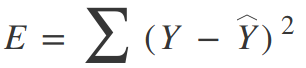

Where Y is our ground truth and Y-hat is our predicted value; we sum over all the samples in our dataset to get the total error. For a classification, we use the Gini Index Function:

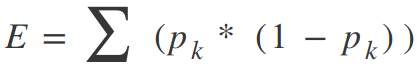

Where pk are the proportion of training instances of class k in a particular prediction node. A node should ideally have an error value of zero, which means that each split outputs a single class 100% of the time. This is exactly what we want because then we know, once we get to that particular decision node, what exactly our output will be whether we are on one side of the decision boundary or the other.

This concept of having a single class per-split across our dataset is known as information gain. Check out the example below.

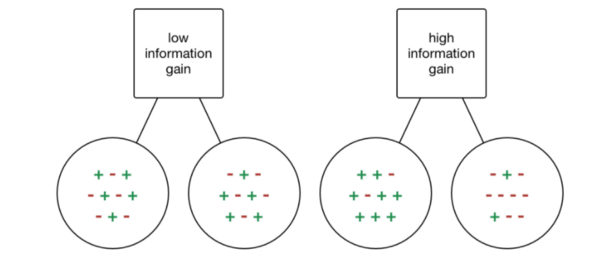

If we were to choose a split where each output has a mix of classes depending on the input data, then we really haven’t gained any information at all; we don’t know any better whether or not a particular node i.e feature has any influence in classifying our data! On the otherhand, if our split has a high percentage of each class for each output, then we have gained the information that splitting in that particular way on that particular feature variable gives us a particular output!

Now we could of course keep splitting and splitting and splitting until our tree has thousands of branches….. but that’s not really such a good idea! Our decision tree would be huge, slow, and overfitted to our training dataset. Thus, we will set some predefined stopping criterion to halt the construction of the tree.

The most common stopping method is to use a minimum count on the number of training examples assigned to each leaf node. If the count is less than some minimum value then the split is not accepted and the node is taken as a final leaf node. If all of our leafs nodes become final, the training stops. A smaller minimum count will give you finer splits and potentially more information, but is also prone to overfitting on your training data. Too large of a min count and you might stop to early. As such, the min value is usually set based on the dataset, depending on how many examples are expected to be in each class.

### Pruning
Because of the nature of training decision trees they can be prone to major overfitting. Setting the correct value for minimum number of instances per node can be challenging. Most of the time, we might just go with a safe bet and make that minimum quite small, resulting in there being many splits and a very large, complex tree. The key is that many of these splits will end up being redundant and unnecessary to increasing the accuracy of our model.

Tree pruning is a technique that leverages this splitting redundancy to remove i.e prune the unnecessary splits in our tree. From a high-level, pruning compresses part of the tree from strict and rigid decision boundaries into ones that are more smooth and generalise better, effectively reducing the tree complexity. The complexity of a decision tree is defined as the number of splits in the tree.

A simple yet highly effective pruning method is to go through each node in the tree and evaluate the effect of removing it on the cost function. If it doesn’t change much, then prune away!

### An Example in Scikit Learn
Decision trees for both classification and regression are super easy to use in Scikit Learn with a built in class! We’ll first load in our dataset and initialise our decision tree for classification. Running training is then a simple one-liner!

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree

# Load in our dataset
iris_data = load_iris()

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris_data.data, iris_data.target)

Scikit Learn also allows us to visualise our tree using the graphviz library. It comes with a few options that will help in visualising the decision nodes and splits that the model learned which is super useful for understanding how it all works! Below we will colour the nodes based on the feature names and display the class and feature information of each node.


In [22]:
import graphviz 
dot_data = tree.export_graphviz(classification_tree, out_file=None, 
                     feature_names=iris_data.feature_names,  
                     class_names=iris_data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("iris") 

There are several parameters that you can set for your decision tree model in Scikit Learn too. Here are a few of the more interesting ones to play around with to try and get some better results:<br>
<b>max_depth:</b> The max depth of the tree where we will stop splitting the nodes. This is similar to controlling the maximum number of layers in a deep neural network. Lower will make your model faster but not as accurate; higher can give you accuracy but risks overfitting and may be slow.<br>
<b>min_samples_split:</b> The minimum number of samples required to split a node. We discussed this aspect of decision trees above and how setting it to a higher value would help mitigate overfitting.<br>
<b>max_features:</b> The number of features to consider when looking for the best split. Higher means potentially better results with the tradeoff of training taking longer.<br>
<b>min_impurity_split:</b> Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold. This can be used to tradeoff combating overfitting (high value, small tree) vs high accuracy (low value, big tree).<br>
<b>presort:</b>Z Whether to presort the data to speed up the finding of best splits in fitting. If we sort our data on each feature beforehand, our training algorithm will have a much easier time finding good values to split on.

### Pros
1. Easy to understand and interpret. At each node, we are able to see exactly what decision our model is making. In practice we’ll be able to fully understand where our accuracies and errors are coming from, what type of data the model would do well with, and how the output is influenced by the values of the features. Scikit learn’s visualisation tool is a fantastic option for visualising and understanding decision trees.<br>
2. Require very little data preparation. Many ML models may require heavy data pre-processing such as normalization and may require complex regularisation schemes. Decision trees on the other hand work quite well out of the box after tweaking a few of the parameters.<br>
3. The cost of using the tree for inference is logarithmic in the number of data points used to train the tree. That’s a huge plus since it means that having more data won’t necessarily make a huge dent in our inference speed.
### Cons
1. Overfitting is quite common with decision trees simply due to the nature of their training. It’s often recommended to perform some type of dimensionality reduction such as PCA so that the tree doesn’t have to learn splits on so many features.<br>
2. For similar reasons as the case of overfitting, decision trees are also vulnerable to becoming biased to the classes that have a majority in the dataset. It’s always a good idea to do some kind of class balancing such as class weights, sampling, or a specialised loss function.


# Random Forest

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:<br>
1. Random sampling of training data points when building trees
2. Random subsets of features considered when splitting nodes
### Random sampling of training observations
When training, each tree in a random forest learns from a random sample of the data points. The samples are drawn with replacement, known as bootstrapping, which means that some samples will be used multiple times in a single tree. The idea is that by training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall, the entire forest will have lower variance but not at the cost of increasing the bias.<br>
At test time, predictions are made by averaging the predictions of each decision tree. This procedure of training each individual learner on different bootstrapped subsets of the data and then averaging the predictions is known as bagging, short for bootstrap aggregating.<br>
### Random Subsets of features for splitting nodes
The other main concept in the random forest is that only a subset of all the features are considered for splitting each node in each decision tree. Generally this is set to sqrt(n_features) for classification meaning that if there are 16 features, at each node in each tree, only 4 random features will be considered for splitting the node. (The random forest can also be trained considering all the features at every node as is common in regression. These options can be controlled in the Scikit-Learn Random Forest implementation).<br>
If you can comprehend a single decision tree, the idea of bagging, and random subsets of features, then you have a pretty good understanding of how a random forest works:<br>
The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.<br>
To understand why a random forest is better than a single decision tree imagine the following scenario: you have to decide whether Tesla stock will go up and you have access to a dozen analysts who have no prior knowledge about the company. Each analyst has low bias because they don’t come in with any assumptions, and is allowed to learn from a dataset of news reports.
This might seem like an ideal situation, but the problem is that the reports are likely to contain noise in addition to real signals. Because the analysts are basing their predictions entirely on the data — they have high flexibility — they can be swayed by irrelevant information. The analysts might come up with differing predictions from the same dataset. Moreover, each individual analyst has high variance and would come up with drastically different predictions if given a different training set of reports.<br>
The solution is to not rely on any one individual, but pool the votes of each analyst. Furthermore, like in a random forest, allow each analyst access to only a section of the reports and hope the effects of the noisy information will be cancelled out by the sampling. In real life, we rely on multiple sources (never trust a solitary Amazon review), and therefore, not only is a decision tree intuitive, but so is the idea of combining them in a random forest.
Random Forest in Practice<br>
Next, we’ll build a random forest in Python using Scikit-Learn. Instead of learning a simple problem, we’ll use a real-world dataset split into a training and testing set. We use a test set as an estimate of how the model will perform on new data which also lets us determine how much the model is overfitting.

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
a = export_graphviz(estimator, out_file=None, 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(a)
graph.render("tree") 
# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

'tree.pdf'

# Naive Bayes

Naive Bayes is a probabilistic classifier inspired by the Bayes theorem under a simple assumption which is the attributes are conditionally independent.

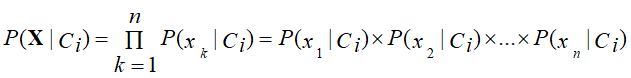

The classification is conducted by deriving the maximum posterior which is the maximal P(Ci|X) with the above assumption applying to Bayes theorem. This assumption greatly reduces the computational cost by only counting the class distribution. Even though the assumption is not valid in most cases since the attributes are dependent, surprisingly Naive Bayes has able to perform impressively.<br>
<br>
Naive Bayes is a very simple algorithm to implement and good results have obtained in most cases. It can be easily scalable to larger datasets since it takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.<br>
<br>
Naive Bayes can suffer from a problem called the zero probability problem. When the conditional probability is zero for a particular attribute, it fails to give a valid prediction. This needs to be fixed explicitly using a Laplacian estimator.

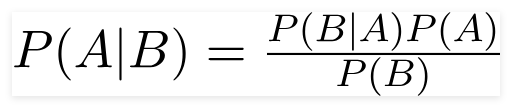

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.
Example:

# Types of Naive Bayes Classifier:
## Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

## Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

## Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.


Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.


In [7]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [10]:

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



# TF-IDF
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.
If i give you a sentence for example “This building is so tall”. Its easy for us to understand the sentence as we know the semantics of the words and the sentence. But how will the computer understand this sentence? The computer can understand any data only in the form of numerical value. So, for this reason we vectorize all of the text so that the computer can understand the text better.<br>
By vectorizing the documents we can further perform multiple tasks such as finding the relevant documents, ranking, clustering and so on. This is the same thing that happens when you perform a google search. The web pages are called documents and the search text with which you search is called a query. google maintains a fixed representation for all of the documents. When you search with a query, google will find the relevance of the query with all of the documents, ranks them in the order of relevance and shows you the top k documents, all of this process is done using the vectorized form of query and documents. Although Googles algorithms are highly sophisticated and optimized, this is their underlying structure.

## Term Frequency
This measures the frequency of a word in a document. This highly depends on the length of the document and the generality of word, for example a very common word such as “was” can appear multiple times in a document. but if we take two documents one which have 100 words and other which have 10,000 words. There is a high probability that the common word such as “was” can be present more in the 10,000 worded document. But we cannot say that the longer document is more important than the shorter document. For this exact reason, we perform a normalization on the frequency value. we divide the the frequency with the total number of words in the document.

## Document Frequency

This measures the importance of document in whole set of corpus, this is very similar to TF. The only difference is that TF is frequency counter for a term t in document d, where as DF is the count of occurrences of term t in the document set N. In other words, DF is the number of documents in which the word is present. We consider one occurrence if the term consists in the document at least once, we do not need to know the number of times the term is present.

# Pipelines
Data science pipelines are sequences of processing and analysis steps applied to data for a specific purpose. They're useful in production projects, and they can also be useful if one expects to encounter the same type of business question in the future, so as to save on design time and coding. For instance, one could remove outliers, apply dimensionality reduction techniques, and then run the result through a random forest classifier to provide automatic classification on a particular dataset that is pulled every week.


```
Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.
```
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’, as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to ‘passthrough’ or None.


In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer (discussed in Feature Engineering), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [13]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

## What is Confusion Matrix and why you need it?
Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.
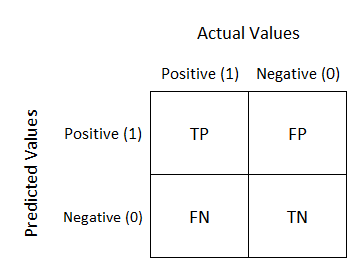

### True Positive:
Interpretation: You predicted positive and it’s true.
You predicted that a woman is pregnant and she actually is.
### True Negative:
Interpretation: You predicted negative and it’s true.
You predicted that a man is not pregnant and he actually is not.
### False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.
You predicted that a man is pregnant but he actually is not.
### False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.
You predicted that a woman is not pregnant but she actually is.
Just Remember, We describe predicted values as Positive and Negative and actual values as True and False.


Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data:

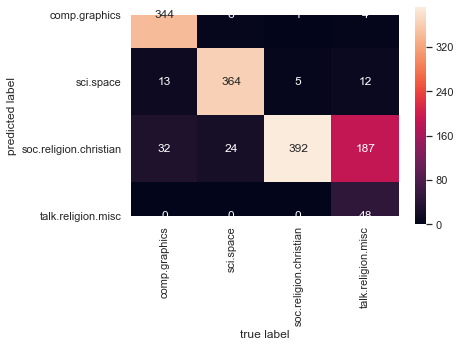

In [31]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline. Here's a quick utility function that will return the prediction for a single string:

In [16]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
predict_category('sending a payload to the ISS')

'sci.space'

In [19]:
predict_category('discussing atheism')

'soc.religion.christian'

In [20]:
predict_category('mobile chip')

'comp.graphics'

In [41]:
predict_category('islam')

'soc.religion.christian'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.